## Where does the plastic in our oceans come from?

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

- https://ourworldindata.org/ocean-plastics
- https://theoceancleanup.com/sources/
- https://gramener.com/comicgenfriday/datasets

- https://www.investopedia.com/terms/p/per-capita-gdp.asp

Year - 2019

Country Vs Mismanaged, Emitted to Ocean (Absolute, share)

Country Vs Mismanaged, Emitted to Ocean per capita(Absolute)

River Vs Emitted to Ocean

#### --------
Continent Vs Mismanaged, Emitted to Ocean (Absolute, share)

Continent Vs Mismanaged per capita, Emitted to Ocean  per capita(Absolute)


# plastic-waste

## plastic-waste-mismanaged.csv

In [3]:
df_total = pd.read_csv('data/plastic-waste-mismanaged.csv')
print(df_total.info())
print(df_total.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Entity                                         171 non-null    object
 1   Code                                           160 non-null    object
 2   Year                                           171 non-null    int64 
 3   Mismanaged plastic waste (metric tons year-1)  171 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 5.5+ KB
None
                Entity Code  Year  \
0               Africa  NaN  2019   
1              Albania  ALB  2019   
2              Algeria  DZA  2019   
3               Angola  AGO  2019   
4  Antigua and Barbuda  ATG  2019   

   Mismanaged plastic waste (metric tons year-1)  
0                                       13690104  
1                                          69833  
2              

In [4]:
df_total.rename(columns={'Mismanaged plastic waste (metric tons year-1)':'total_waste'}, inplace=True)
print(f"\nMissing values: {df_total.isnull().sum()}")
print(df_total[df_total['Code'].isnull()])


Missing values: Entity          0
Code           11
Year            0
total_waste     0
dtype: int64
            Entity Code  Year  total_waste
0           Africa  NaN  2019     13690104
6             Asia  NaN  2019     39881167
38           EU-27  NaN  2019       266588
45          Europe  NaN  2019      1180718
86           Macau  NaN  2019        14749
96      Micronesia  NaN  2019          447
107  North America  NaN  2019      1927484
110        Oceania  NaN  2019       136506
128   Saint Martin  NaN  2019            8
137   Sint Maarten  NaN  2019            3
143  South America  NaN  2019      4942514


## plastic-waste-emitted-to-the-ocean.csv

In [5]:
df_ocean = pd.read_csv("data/plastic-waste-emitted-to-the-ocean.csv")
print(df_ocean.info())
df_ocean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Entity                                                      171 non-null    object
 1   Code                                                        160 non-null    object
 2   Year                                                        171 non-null    int64 
 3   Mismanaged waste emitted to the ocean (metric tons year-1)  171 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 5.5+ KB
None


,Entity,Code,Year,Mismanaged waste emitted to the ocean (metric tons year-1)
0,Africa,NaN,2019,78252
1,Albania,ALB,2019,1565
2,Algeria,DZA,2019,5774
3,Angola,AGO,2019,860
4,Antigua and Barbuda,ATG,2019,2


In [6]:
df_ocean['Year'].value_counts()

2019    171
Name: Year, dtype: int64

In [7]:
df_ocean.rename(columns={'Mismanaged waste emitted to the ocean (metric tons year-1)':'ocean_waste'}, inplace=True)
print(f"\nMissing values: {df_ocean.isnull().sum()}")
print(df_ocean[df_ocean['Code'].isnull()])


Missing values: Entity          0
Code           11
Year            0
ocean_waste     0
dtype: int64
            Entity Code  Year  ocean_waste
0           Africa  NaN  2019        78252
6             Asia  NaN  2019       793298
38           EU-27  NaN  2019         2157
45          Europe  NaN  2019         5832
86           Macau  NaN  2019          341
96      Micronesia  NaN  2019           37
107  North America  NaN  2019        44067
110        Oceania  NaN  2019         3631
128   Saint Martin  NaN  2019            0
137   Sint Maarten  NaN  2019            0
143  South America  NaN  2019        54000


In [8]:

df_ocean.sort_values(by='ocean_waste', ascending=False, inplace=True)
df_ocean.head(10)

,Entity,Code,Year,ocean_waste
168,World,OWID_WRL,2019,979458
6,Asia,NaN,2019,793298
118,Philippines,PHL,2019,356371
66,India,IND,2019,126513
0,Africa,NaN,2019,78252
88,Malaysia,MYS,2019,73098
25,China,CHN,2019,70707
67,Indonesia,IDN,2019,56333
143,South America,NaN,2019,54000
107,North America,NaN,2019,44067


## Merge plastic-waste-mismanaged.csv and plastic-waste-emitted-to-the-ocean.csv

In [9]:
df_mismanaged = df_total.merge(df_ocean, how='inner', on=['Entity','Code','Year'])
df_mismanaged['ocean_waste_%'] = round(100*df_mismanaged['ocean_waste']/df_mismanaged['total_waste'])
print(df_mismanaged.info())
df_mismanaged.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 170
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entity         171 non-null    object 
 1   Code           160 non-null    object 
 2   Year           171 non-null    int64  
 3   total_waste    171 non-null    int64  
 4   ocean_waste    171 non-null    int64  
 5   ocean_waste_%  171 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.4+ KB
None


,Entity,Code,Year,total_waste,ocean_waste,ocean_waste_%
0,Africa,NaN,2019,13690104,78252,1.0
1,Albania,ALB,2019,69833,1565,2.0
2,Algeria,DZA,2019,764578,5774,1.0
3,Angola,AGO,2019,236946,860,0.0
4,Antigua and Barbuda,ATG,2019,627,2,0.0


In [10]:
print(f"\nMissing values: {df_mismanaged.isnull().sum()}")
print(df_mismanaged[df_mismanaged['Code'].isnull()])


Missing values: Entity            0
Code             11
Year              0
total_waste       0
ocean_waste       0
ocean_waste_%     0
dtype: int64
            Entity Code  Year  total_waste  ocean_waste  ocean_waste_%
0           Africa  NaN  2019     13690104        78252            1.0
6             Asia  NaN  2019     39881167       793298            2.0
38           EU-27  NaN  2019       266588         2157            1.0
45          Europe  NaN  2019      1180718         5832            0.0
86           Macau  NaN  2019        14749          341            2.0
96      Micronesia  NaN  2019          447           37            8.0
107  North America  NaN  2019      1927484        44067            2.0
110        Oceania  NaN  2019       136506         3631            3.0
128   Saint Martin  NaN  2019            8            0            0.0
137   Sint Maarten  NaN  2019            3            0            0.0
143  South America  NaN  2019      4942514        54000            1.

### Retain only the country data
The dataset also contains information at continent, some areas (Code = NaN) and world level (Code = OWID_WRL). Remove these rows
- Europe &  EU 27: Combine these 2 (TODO)
    - EU 27 - 27 countries that are part of EU
    - Europe - 23 Countries are not part of the European Union

In [11]:
df_ = df_mismanaged[(df_mismanaged['Code'].isnull()) | (df_mismanaged['Code'] == 'OWID_WRL') ]
print(df_.shape[0])
print(df_)

12
            Entity      Code  Year  total_waste  ocean_waste  ocean_waste_%
0           Africa       NaN  2019     13690104        78252            1.0
6             Asia       NaN  2019     39881167       793298            2.0
38           EU-27       NaN  2019       266588         2157            1.0
45          Europe       NaN  2019      1180718         5832            0.0
86           Macau       NaN  2019        14749          341            2.0
96      Micronesia       NaN  2019          447           37            8.0
107  North America       NaN  2019      1927484        44067            2.0
110        Oceania       NaN  2019       136506         3631            3.0
128   Saint Martin       NaN  2019            8            0            0.0
137   Sint Maarten       NaN  2019            3            0            0.0
143  South America       NaN  2019      4942514        54000            1.0
168          World  OWID_WRL  2019     61773700       979458            2.0


In [12]:
from utils import annotate

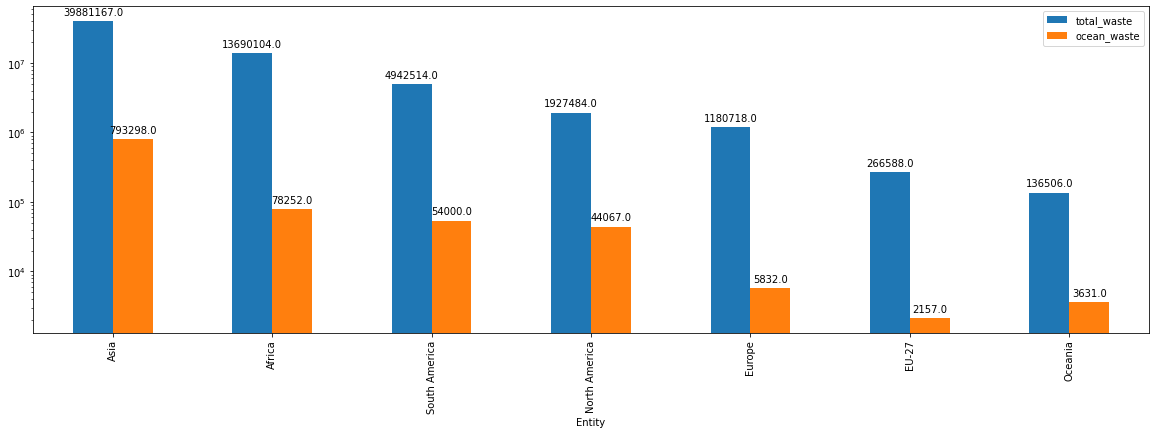

In [13]:
df_mismanaged_continent = df_mismanaged[df_mismanaged['Code'].isnull()].sort_values(by='total_waste', ascending=False)
ax = df_mismanaged_continent[:7].plot.bar(x='Entity', y=['total_waste', 'ocean_waste'], logy=True, figsize=(20,6))
annotate(ax)

In [14]:
df_mismanaged_countries = df_mismanaged[~((df_mismanaged['Code'].isnull()) | (df_mismanaged['Code'] == 'OWID_WRL'))]

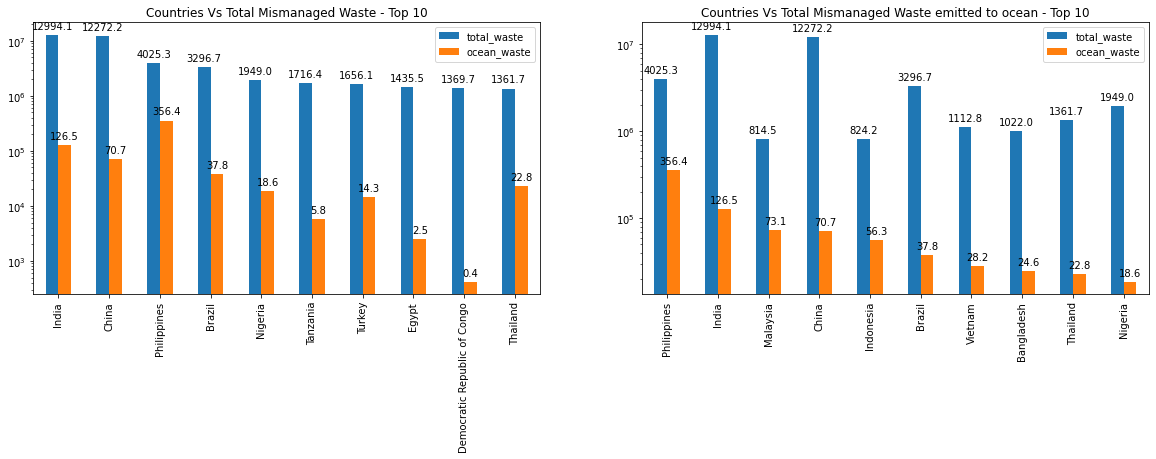

In [15]:
# plot
plt.figure(figsize=(20, 5))

ax = plt.subplot(1,2,1)
ax = df_mismanaged_countries.sort_values(by='total_waste', ascending=False)[:10].plot.bar(x='Entity', y=['total_waste', 'ocean_waste'], xlabel='', logy=True, ax=ax)
annotate(ax, 'Countries Vs Total Mismanaged Waste - Top 10', divideby=1000)

ax = plt.subplot(1,2,2)
ax = df_mismanaged_countries.sort_values(by='ocean_waste', ascending=False)[:10].plot.bar(x='Entity', y=['total_waste', 'ocean_waste'], xlabel='', logy=True, ax=ax)
annotate(ax, 'Countries Vs Total Mismanaged Waste emitted to ocean - Top 10', divideby=1000)

plt.show()

In [16]:
top_ocean_waste_countries = df_mismanaged_countries.sort_values(by='ocean_waste', ascending=False)[:10]['Entity'].tolist()
print(top_ocean_waste_countries)

['Philippines', 'India', 'Malaysia', 'China', 'Indonesia', 'Brazil', 'Vietnam', 'Bangladesh', 'Thailand', 'Nigeria']


/var/folders/6d/t1t1r89n1q95d2ztv2qstyb40000gr/T/ipykernel_1132/2480162360.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_top_ocean_waste_countries = df_mismanaged_countries.sort_values(by='ocean_waste_%', ascending=False)[df_mismanaged_countries['Entity'].isin(top_ocean_waste_countries)]


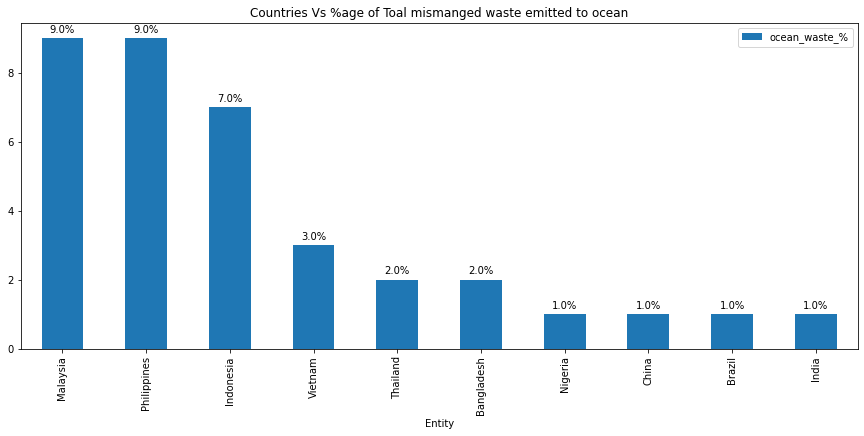

In [17]:
# This should be for the countries that are top ocean wasters
df_top_ocean_waste_countries = df_mismanaged_countries.sort_values(by='ocean_waste_%', ascending=False)[df_mismanaged_countries['Entity'].isin(top_ocean_waste_countries)]
ax = df_top_ocean_waste_countries.plot.bar(x='Entity', y=['ocean_waste_%'], figsize=(15,6))
annotate(ax, 'Countries Vs %age of Toal mismanged waste emitted to ocean', strformat='%')

In [20]:
print(df_mismanaged_countries.head())
df_mismanaged_countries.to_csv('out/plastic-waste.csv')

                Entity Code  Year  total_waste  ocean_waste  ocean_waste_%
1              Albania  ALB  2019        69833         1565            2.0
2              Algeria  DZA  2019       764578         5774            1.0
3               Angola  AGO  2019       236946          860            0.0
4  Antigua and Barbuda  ATG  2019          627            2            0.0
5            Argentina  ARG  2019       465808         4137            1.0


In [ ]:
import geopandas as gpd

df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print(f"Type of df_world: {type(df_world)} Active geometry: {df_world.geometry.name}\n")
print(f"Value counts of geometry column: {df_world.geometry.geom_type.value_counts()}\n")
df_world.head()

In [ ]:
print(df_top_ocean_waste_countries.shape)
df_top_ocean_waste_countries_geo = df_world.merge(df_top_ocean_waste_countries, left_on='name', right_on='Entity', how='right')
df_top_ocean_waste_countries_geo['centroid'] = df_top_ocean_waste_countries_geo.centroid
print(df_top_ocean_waste_countries_geo.shape)
print(df_top_ocean_waste_countries_geo.info())
df_top_ocean_waste_countries_geo

In [ ]:
print(df_mismanaged_countries.shape)
df_mismanaged_countries_geo = df_world.merge(df_mismanaged_countries, left_on='name', right_on='Entity', how='inner')
df_mismanaged_countries_geo['centroid'] = df_mismanaged_countries_geo.centroid
print(df_mismanaged_countries_geo.info())
print(df_mismanaged_countries_geo.shape)
df_mismanaged_countries_geo

In [ ]:
print(df_mismanaged_countries.shape)
df_mismanaged_countries_geo = df_world.merge(df_mismanaged_countries, left_on='name', right_on='Entity', how='inner')
df_mismanaged_countries_geo['centroid'] = df_mismanaged_countries_geo.centroid
print(df_mismanaged_countries_geo.info())
print(df_mismanaged_countries_geo.shape)
df_mismanaged_countries_geo

In [ ]:
from utils import addColorbar

ax, cax = addColorbar()
ax = df_world["geometry"].boundary.plot(ax=ax, figsize=(20,16))
df_mismanaged_countries_geo.plot( column="ocean_waste", ax=ax, cax=cax, cmap='OrRd', 
                     legend=True, legend_kwds={"label": "ocean_waste"})
df_top_ocean_waste_countries_geo.apply(lambda x: ax.annotate(text=x['Entity'], xy=(x['centroid'].coords[0][0],x['centroid'].coords[0][1]-5), ha='center'), axis=1)                    
ax.set_title("Countries Vs Total mismanaged waste")

- TODO: Show zoomed view of Asia

## plastics-top-rivers.csv

In [ ]:
df_rivers = pd.read_csv("data/plastics-top-rivers.csv")
print(df_rivers.info())
df_rivers.head()

In [ ]:
df_rivers['Year'].value_counts()

In [ ]:
df_rivers['Entity'][0:10]

In [ ]:
def getCountry(entity):
    if '(' in entity and ') in entity':
        return entity.split('(')[1].split(')')[0]
    else:
        return '-'

df_rivers['country'] = df_rivers['Entity'].apply(lambda x: getCountry(x))
df_rivers.head(10)

In [ ]:
df_rivers.rename(columns={'Share of global plastics emitted to ocean':'plastics'}, inplace=True)
df_rivers.sort_values(by='plastics', ascending=False, inplace=True)
df_rivers.head(10)

In [ ]:
df_rivers[df_rivers['country']=='-']

In [ ]:
df_rivers[:10].plot.bar(x='Entity', y='plastics', logy=True, figsize=(20,6))

In [ ]:
df_rivers_country = df_rivers.groupby(by='country').agg({'plastics':np.sum}).sort_values(by='plastics', ascending=False)
df_rivers_country

In [ ]:
df_rivers_country[:10].plot.bar(logy=True, figsize=(20,6))

## total waste emitted to the ocean : waste from rivers

# plastic-waste-per-capita

## ocean-plastic-waste-per-capita-vs-gdp.csv

In [ ]:
df_gdp = pd.read_csv('data/ocean-plastic-waste-per-capita-vs-gdp.csv')
df_gdp = df_gdp[(df_gdp['Year']==2019) & (~(df_gdp['Code'].isnull())) & (df_gdp['Entity']!='World')]
df_gdp.reset_index(inplace=True)
df_gdp.drop(columns=['index', 'Continent'],inplace=True)
df_gdp.rename(columns={'Mismanaged plastic waste to ocean per capita (kg per year)':'waste_per_capita', 'GDP per capita, PPP (constant 2017 international $)':'gdp'}, inplace=True)
print(df_gdp.info())
df_gdp.head()

In [ ]:
df_gdp[df_gdp['waste_per_capita'].isnull()].shape

Merge the df_waste, df_gdp

In [ ]:
df_waste_gdp = df_waste.merge(df_gdp, how='inner', on='Entity')
print(df_waste_gdp.info())
df_waste_gdp.head()

In [ ]:
plt.figure(figsize=(20, 16))

ax = plt.subplot(3,3,1)
ax = df_waste_gdp.sort_values(by='waste', ascending=False)[:5].plot.bar(x='Entity', y='waste', ax=ax)
annotate(ax)

ax = plt.subplot(3,3,2)
df_waste_gdp.sort_values(by='waste_per_capita', ascending=False)[:5].plot.bar(x='Entity', y='waste_per_capita', ax=ax)
annotate(ax)

ax = plt.subplot(3,3,3)
ax = df_waste_gdp.sort_values(by='gdp', ascending=True)[:5].plot.bar(x='Entity', y='gdp', ax=ax)
annotate(ax)

plt.show()

In [ ]:
df_waste_gdp.sort_values(by='waste', ascending=False)[:5]

In [ ]:
df_waste_gdp.sort_values(by='gdp', ascending=False)[:5]